# Assignment – Preprocessing Data for scikit-learn:


## Your assignment is to:
### • First study the dataset and the associated description of the data (i.e. “data dictionary”). You may need to look around a bit, but it’s there!
### • Create a pandas DataFrame with a subset of the columns in the dataset. You should include the column that indicates edible or poisonous, the column that includes odor, and at least one other column of your choosing.
### • Add meaningful names for each column.
### • Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might become 0 and “p” might become 1. This is because your downstream processing in Project 4 using scikit-learn requires that values be stored as numerics.
### • Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.
### • Include some text describing your preliminary conclusions about whether either of the other columns could be helpful in predicting if a  specific mushroom is edible or poisonous.

In [15]:
#importing libraries:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
import pandas as pd

In [16]:
#Task: Create a pandas DataFrame with a subset of the columns in the dataset. You should include the column that indicates edible or poisonous, the column that includes odor, and at least one other column of your choosing.

#here we extracting the url and setting it to pull mushrooms data into a DataFrame and using 3 columns for analysis.
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
mushrooms_df = pd.read_csv(url, header = None, usecols = [0, 3, 5], names = ['edibility', 'cap_color', 'odor'])
display(mushrooms_df)

,edibility,cap_color,odor
0,p,n,p
1,e,y,a
2,e,w,l
3,p,w,p
4,e,g,n
...,...,...,...
8119,e,n,n
8120,e,n,n
8121,e,n,n
8122,p,n,y


In [17]:
#Task: Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might become 0 and “p” might become 1. 

#here we have to create a dictionary to assign values for edibility, 0 for edible and 1 for poisonous.
newvals_dict = {'e' : 0, 'p' : 1}
mushrooms_df.replace({'edibility': newvals_dict}, inplace=True)
display(mushrooms_df)

,edibility,cap_color,odor
0,1,n,p
1,0,y,a
2,0,w,l
3,1,w,p
4,0,g,n
...,...,...,...
8119,0,n,n
8120,0,n,n
8121,0,n,n
8122,1,n,y


In [18]:
#here we utilizing same newvals dict for cap_color, assigning number based on first letter of color aka b=Brown.
newvals_dict = {'n' : 0, 'b' : 1, 'c' : 2, 'g' : 3, 'r' : 4, 'p' : 5, 'u' : 6, 'e' : 7, 'w' : 8, 'y' : 9}
mushrooms_df.replace({'cap_color': newvals_dict}, inplace=True)
display(mushrooms_df)

,edibility,cap_color,odor
0,1,0,p
1,0,9,a
2,0,8,l
3,1,8,p
4,0,3,n
...,...,...,...
8119,0,0,n
8120,0,0,n
8121,0,0,n
8122,1,0,y


In [19]:
#here we utilizing newvals dict for odor, assigning number based on first letter of odor when applicable aka a=Almond.
newvals_dict = {'a' : 0, 'l' : 1, 'c' : 2, 'y' : 3, 'f' : 4, 'm' : 5, 'n' : 6, 'p' : 7, 's' : 8}
mushrooms_df.replace({'odor': newvals_dict}, inplace=True)
display(mushrooms_df)

,edibility,cap_color,odor
0,1,0,7
1,0,9,0
2,0,8,1
3,1,8,7
4,0,3,6
...,...,...,...
8119,0,0,6
8120,0,0,6
8121,0,0,6
8122,1,0,3


C:\Users\brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


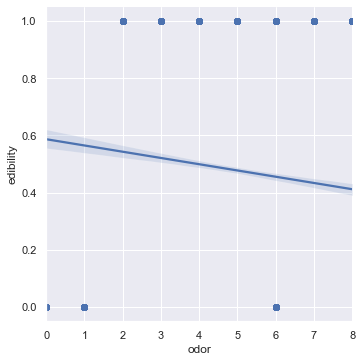

In [20]:
#Task: Perform exploratory data analysis - show the distribution of data for each of the columns you selected, and show scatterplots for edible/poisonous vs. odor as well as the other column that you selected

#creating a scatterplot to show odor/edibility relationship, utilizing dark settings.
sns.set(style='darkgrid')
sns.set_color_codes('dark')
sns.lmplot('odor', 'edibility', data=mushrooms_df)

C:\Users\brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


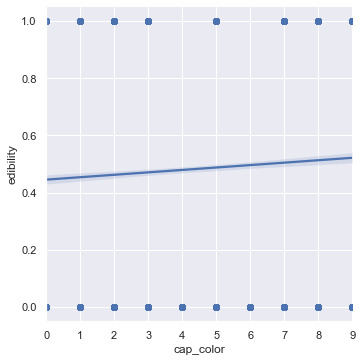

In [21]:
sns.lmplot('cap_color', 'edibility', data=mushrooms_df) #doing the same thing here as above!

In [22]:
#here we need shape/size of mushroom_df to indicate how testing will be separated.
mushrooms_df.shape

(8124, 3)

In [23]:
#Using the first 8k items for training and remaining 124 for testing purposes based on columns above.
s_edibility = pd.Series(mushrooms_df.edibility[:7999])
s_cap_color = pd.Series(mushrooms_df.cap_color[:7999])
s_odor = pd.Series(mushrooms_df.odor[:7999])

training_df = pd.DataFrame({'cap_color':s_cap_color, 'odor':s_odor, 'edibility':s_edibility})

#Series for remaining 124 items for testing.
s_edibility = pd.Series(mushrooms_df.edibility[8000:])
s_cap_color = pd.Series(mushrooms_df.cap_color[8000:])
s_odor = pd.Series(mushrooms_df.odor[8000:])

testing_df = pd.DataFrame({'cap_color':s_cap_color, 'odor':s_odor, 'edibility':s_edibility})

In [24]:
#Created 3 different data sets to test against for each data set, both = cap_color + odor.
knn_cap_color = KNeighborsClassifier(n_neighbors= 5)
knn_odor = KNeighborsClassifier(n_neighbors= 5)
knn_both = KNeighborsClassifier(n_neighbors= 5)

#Fitting each data set w/data from previous dfs, args are features/responses. 
knn_cap_color.fit(training_df[['cap_color']].values, training_df[['edibility']].values.ravel())           
knn_odor.fit(training_df[['odor']].values, training_df[['edibility']].values.ravel())
knn_both.fit(training_df[['cap_color','odor']].values, training_df[['edibility']].values.ravel())

KNeighborsClassifier()

In [25]:
#Testing the cap_color estimator 
testing_df['pre_cap_color'] = pd.Series(knn_cap_color.predict(testing_df[['cap_color']].values), testing_df.index)

#Priting the accuracy score 
print(metrics.accuracy_score(testing_df[['edibility']].values.ravel(),testing_df[['pre_cap_color']].values))

0.5403225806451613


In [26]:
#Testing the odor estimator
testing_df['pre_odor'] = pd.Series(knn_odor.predict(testing_df[['odor']].values), testing_df.index)

#Priting the accuracy score
print(metrics.accuracy_score(testing_df[['edibility']].values.ravel(), testing_df[['pre_odor']].values))

1.0


In [27]:
#Testing the both estimator 
testing_df['pre_both'] = pd.Series(knn_both.predict(testing_df[['cap_color','odor']].values), testing_df.index)

#Priting the accuracy score
print(metrics.accuracy_score(testing_df[['edibility']].values.ravel(), testing_df[['pre_both']].values))

1.0


### Conclusion:
#### To summarize the findings of this analysis, we can conclude that the accuracy scores of mushroom's cap_color is not a great indicator of edibility with a score of .54. While, on the other hand odor is completely accurate at 1.0 and it appears to be more indicative of a poisonous mushroom species than cap_color is.